# Uber Data Analysis With Python

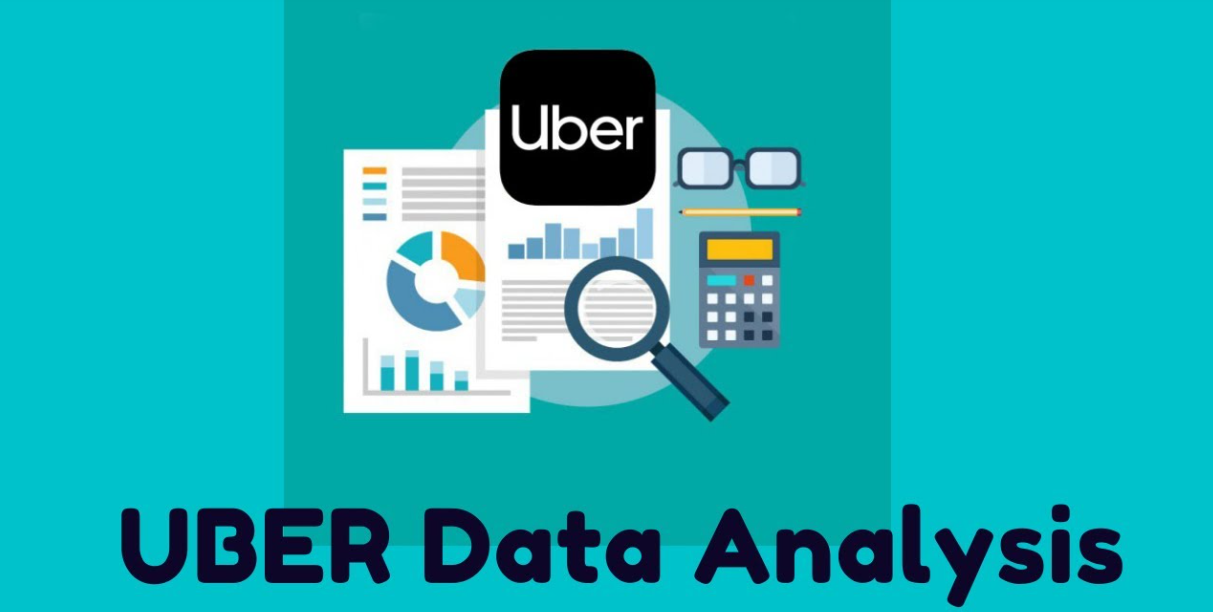

Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

In this project we will mainly use data regarding Uber ride

#### Questions:

## Importing the nacessary libraries:

In [1]:
import pandas as pd
import numpy as np

import datetime
import calendar

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

## Import the dataset:

In [2]:
df=pd.read_csv("Uber Drives.csv", skiprows=-1)
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.shape

(1156, 7)

In [4]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [5]:
# Let us rename the columns:
df.rename(columns={'START_DATE*':'start_date',
                  'END_DATE*':'end_date',
                  'CATEGORY*':'category',
                  'START*':'start',
                  'STOP*':'stop',
                  'MILES*':'miles',
                  'PURPOSE*':'purpose'}, inplace=True)

In [6]:
df.columns

Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

## Check for missing values:

In [7]:
df.isna().sum()

start_date      0
end_date        1
category        1
start           1
stop            1
miles           0
purpose       503
dtype: int64

Here, "purpose" column has the most number of null values. This implies that most of the peoples are not willing to share their purpose of travell

In [8]:
# Drop the missing values:
df.dropna(inplace=True)
df.isna().sum()

start_date    0
end_date      0
category      0
start         0
stop          0
miles         0
purpose       0
dtype: int64

In [9]:
df.shape

(653, 7)

## Datatype of each column:

In [10]:
df.dtypes

start_date     object
end_date       object
category       object
start          object
stop           object
miles         float64
purpose        object
dtype: object

### Change the datatype of "start_date" and "end_date" column to datetime:

In [11]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [12]:
df[['start_date','end_date']].dtypes

start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object

In [13]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


## Create Year, month, day, hour, weekday columns:

In [14]:
month=[]
day=[]
hour=[]
weekday=[]
dayofweek=[]

In [15]:
for i in df['start_date']:
    
    month.append(i.month)
    day.append(i.day)
    hour.append(i.hour)
    dayofweek.append(i.dayofweek)
    weekday.append(calendar.day_name[dayofweek[-1]])
    

In [16]:
df['month']=month
df['day']=day
df['hour']=hour
df['weekday']=weekday

In [17]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,month,day,hour,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,1,21,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,2,20,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,5,17,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,6,14,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,1,6,17,Wednesday


## What are the various categories we have:

In [18]:
df['category'].value_counts()

Business    647
Personal      6
Name: category, dtype: int64

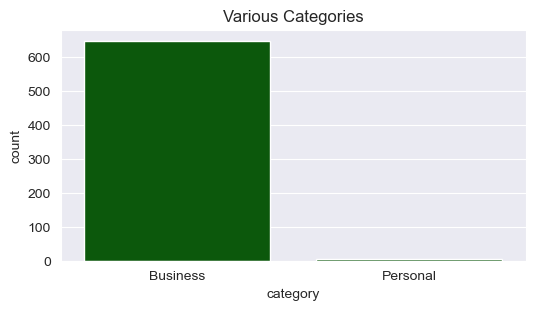

In [19]:
plt.figure(figsize=(6,3))
plt.title("Various Categories")
sns.countplot(x='category', data=df, color='darkgreen')
plt.show()

Here, from this we infer that most of the people used uber service for Business purpose.
Very few people used it for personal purpose.

## How long do people travel with Uber?

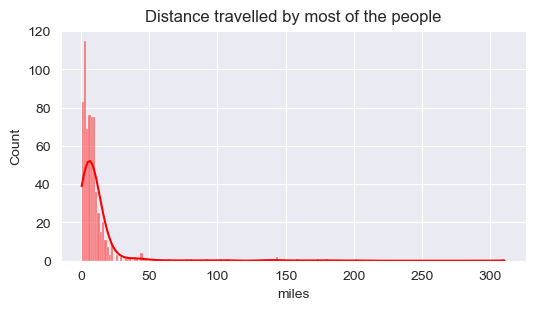

In [20]:
df['miles']
plt.figure(figsize=(6,3))
plt.title("Distance travelled by most of the people")
sns.histplot(x='miles', data=df, kde=True, color='red')
plt.show()

Most of the people prefer uber for travelling short distance of 0 to 25 miles range.

## What Hour Do Most People Take Uber To Their Destination?

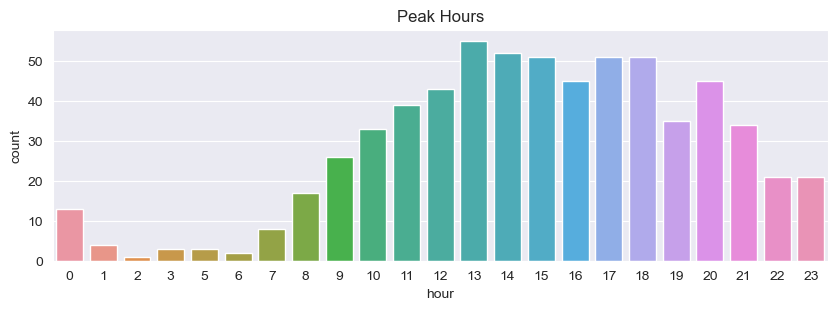

In [21]:
plt.figure(figsize=(10,3))
plt.title("Peak Hours")
sns.countplot(x='hour', data=df)
plt.show()

Most of the trips were taken betwee 10 to 21 hours.These are the Peak hours.

## Purpose Of Trips:

In [22]:
df['purpose'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: purpose, dtype: int64

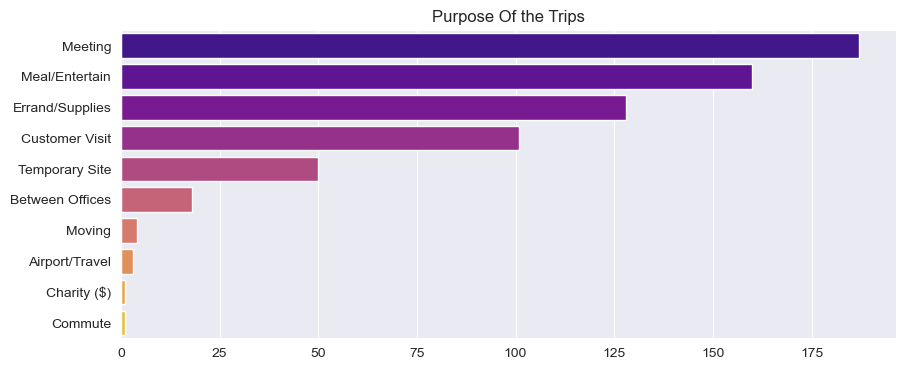

In [23]:
plt.figure(figsize=(10,4))
plt.title('Purpose Of the Trips')
sns.barplot(x=df['purpose'].value_counts().values,
            y=df['purpose'].value_counts().index,
           palette='plasma')
plt.show()

Most of the people preferred uber for meeting, meal/entertain and errand/supplies purpose.Very least people preferred for Travel,charity and commute.

## Day with highest number of trips:

In [24]:
df['weekday'].value_counts()

Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: weekday, dtype: int64

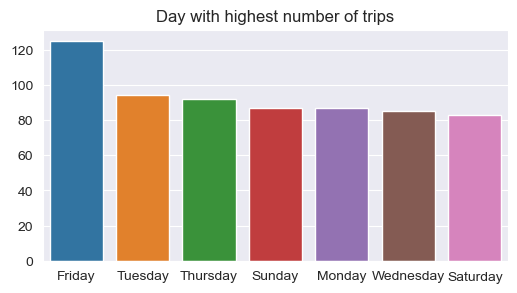

In [25]:
plt.figure(figsize=(6,3))
plt.title("Day with highest number of trips")
sns.barplot(y=df['weekday'].value_counts().values,
            x=df['weekday'].value_counts().index)
plt.show()

## Weekdays Vs Purpose:

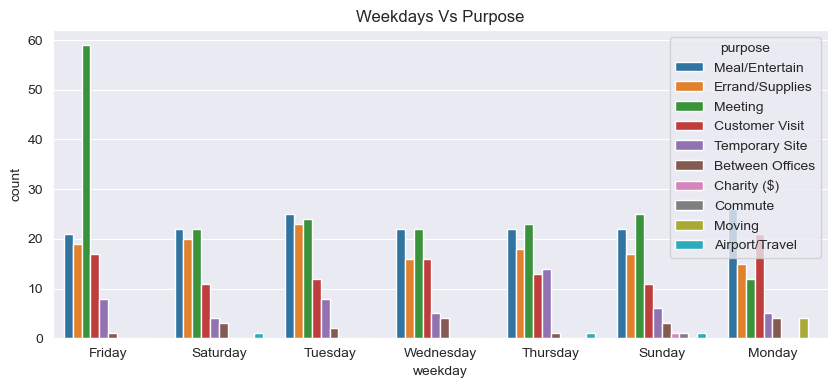

In [26]:
plt.figure(figsize=(10,4))
plt.title("Weekdays Vs Purpose")
sns.countplot(x='weekday',hue='purpose', data=df)
plt.show()

## No of trips per each day of a month:

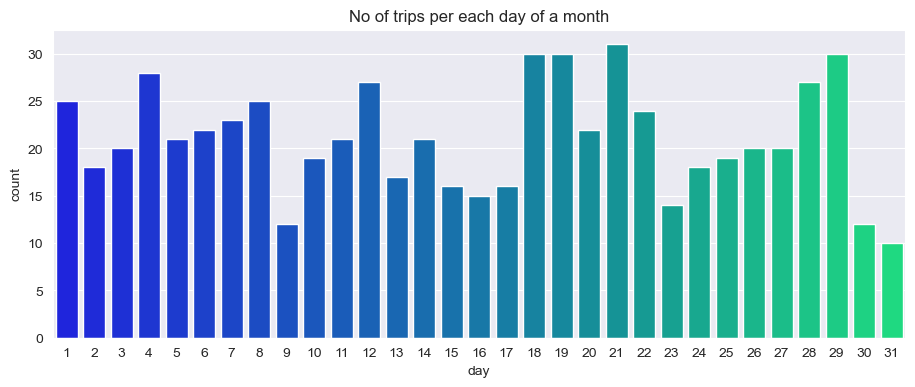

In [27]:
plt.figure(figsize=(11,4))
plt.title("No of trips per each day of a month")
sns.countplot(x='day', data=df, palette='winter')
plt.show()

## Trips in the months:

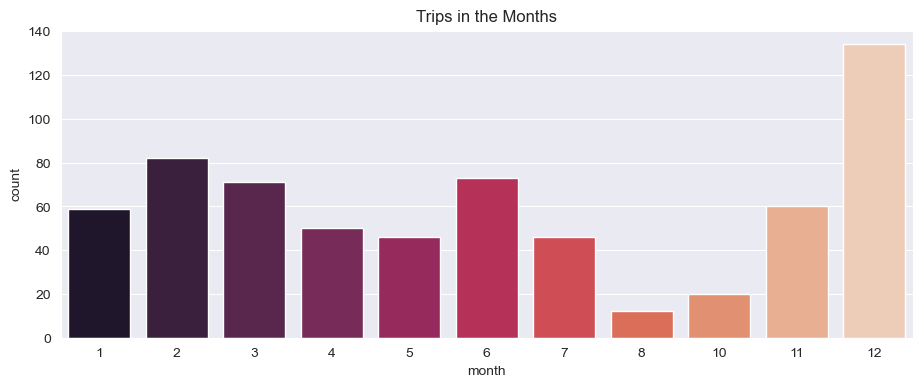

In [28]:
plt.figure(figsize=(11,4))
plt.title("Trips in the Months")
sns.countplot(x='month',data=df, palette='rocket')
plt.show()

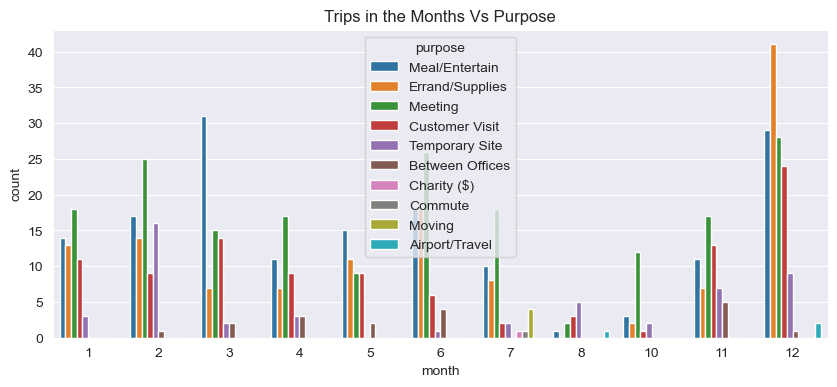

In [29]:
plt.figure(figsize=(10,4))
plt.title("Trips in the Months Vs Purpose")
sns.countplot(x='month', hue='purpose',data=df)
plt.show()

Most of the people used uber in december.

December is the most preferred month for Errand/Supplies.And Airport/Travel is also high in December.This may be due to December is the month Christmas.

September month has no data.

August and October has very less usage.

## Where Do People Start Boarding Their Trip From Most?

In [30]:
df['start'].value_counts()

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Lower Manhattan       1
Lake Reams            1
Latta                 1
Briar Meadow          1
Gampaha               1
Name: start, Length: 131, dtype: int64

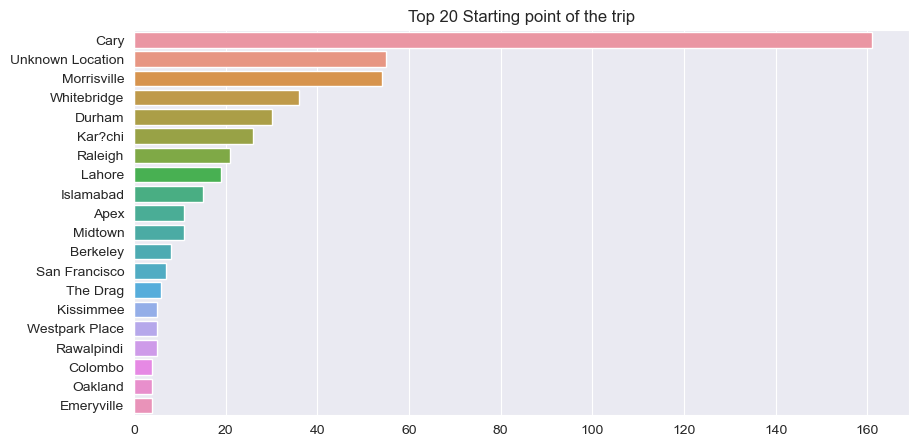

In [31]:
plt.figure(figsize=(10,5))
plt.title("Top 20 Starting point of the trip")
sns.barplot(x=df['start'].value_counts().head(20).values, 
           y=df['start'].value_counts().head(20).index)
plt.show()

Most people in this dataset starts their journey from **Cary** followed by some unknown location and then Morrisville.